In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams

rcParams['figure.figsize'] = 8, 5
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-whitegrid')

#### Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

- нет, т.к. в понятие недвижимость входит много разных объектов.

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

- да

в) количество отказов компьютера,

- да

г) число обращений в поликлинику по району,

- нет

д) координаты автобуса при движении по маршруту,

- да

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

- да

#### Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [30]:
df = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [31]:
df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [33]:
df.index.value_counts()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
                      ..
2007-04-01 02:00:00    1
2011-10-25 02:00:00    1
2016-05-19 02:00:00    1
2005-10-17 21:00:00    1
2013-06-07 22:00:00    1
Name: Datetime, Length: 119064, dtype: int64

Есть дубли по времени - очевидно, из-за перевода стрелок

In [35]:
#пропусков нет
df['DUQ_MW'].isnull().sum()

0

In [36]:
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Text(0, 0.5, 'МВт')

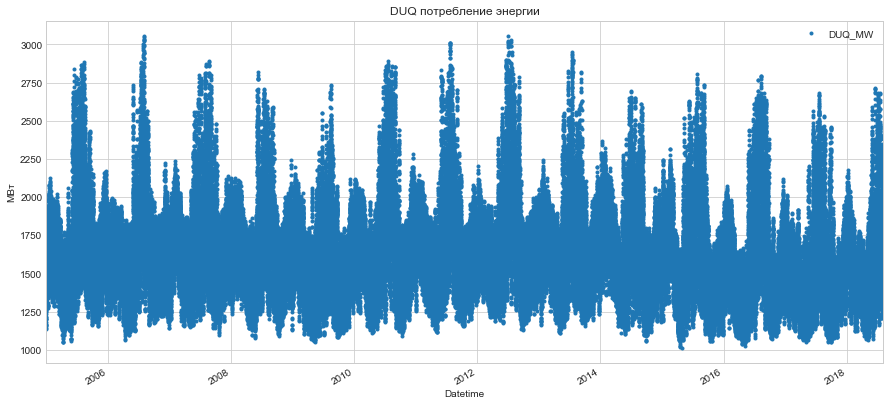

In [37]:
df.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

- На графике видна цикличность потребления, 
- явных провалов визуально нет
- в 2016 впотребление энергии было меньше обычного

Text(0, 0.5, 'МВт')

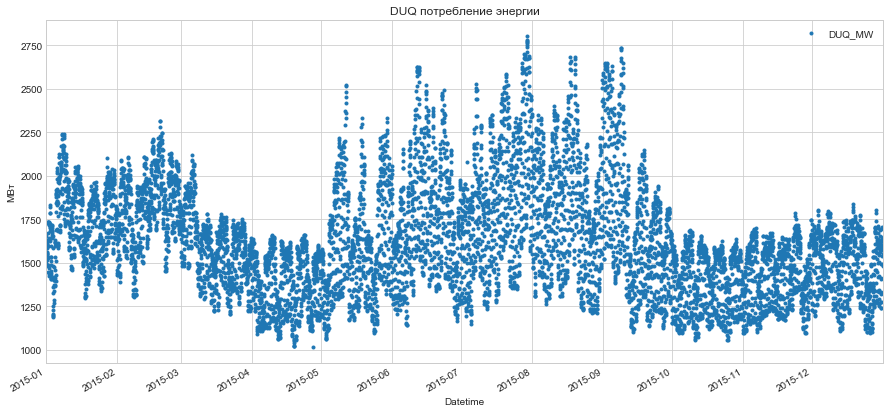

In [42]:
df[df.index.year == 2015].plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

Text(0, 0.5, 'МВт')

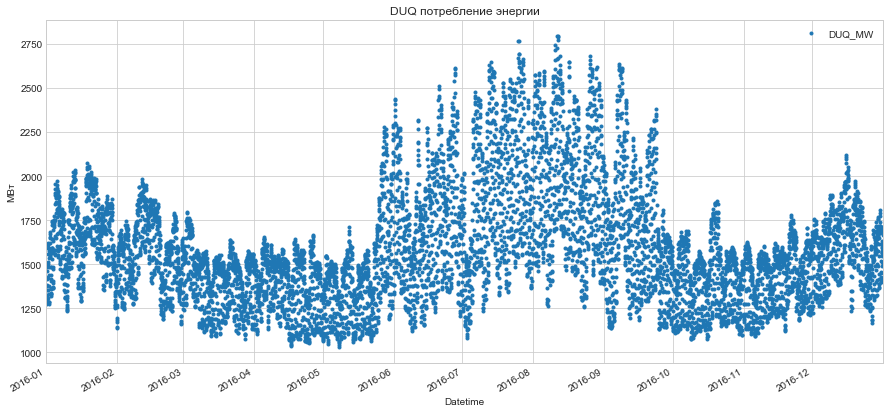

In [41]:
df[df.index.year == 2016].plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

Если сравнивать 2016 с 2015-м, то видно, что в 2016-м с января был плавный спад потребления.

Также в конце 2016-го был какой-то всплеск потребления и затем резкий провал

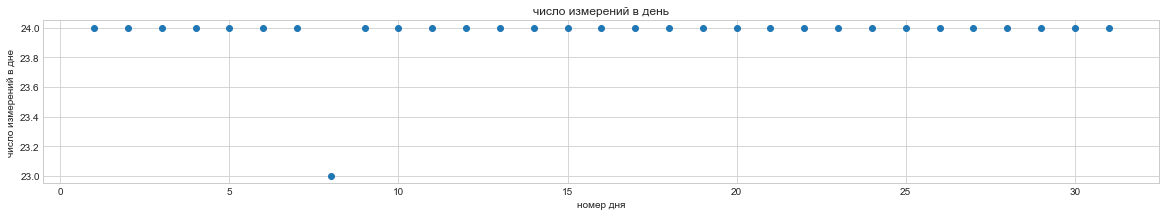

In [43]:
day_H = df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

8-го марта сделано на 1 измерение меньше, чем обычно, что говорит о переводе часов на летнее время

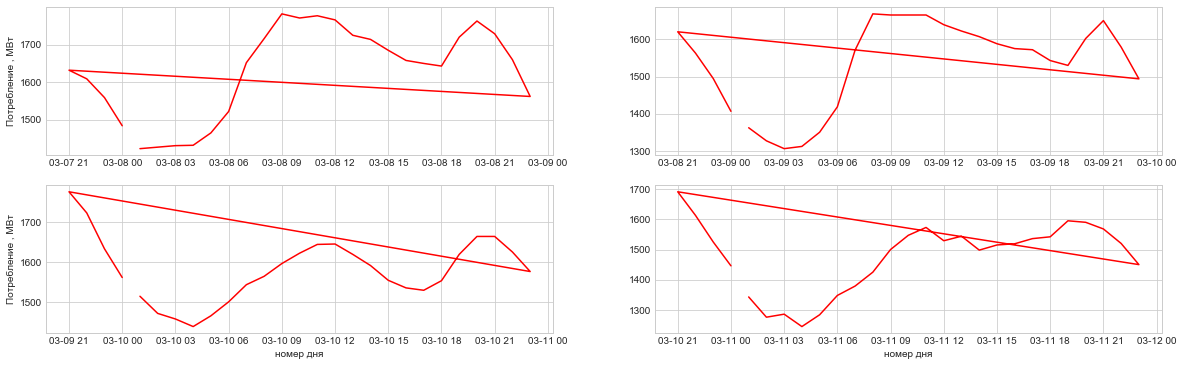

In [47]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(df['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,
         df['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

plt.subplot(2,2,2)
plt.plot(df['2015-03-08 21:00:00':'2015-03-9 23:00:00'].index,
         df['2015-03-08 21:00:00':'2015-03-09 23:00:00']['DUQ_MW'].values, 'r')

plt.subplot(2,2,3)
plt.plot(df['2012-03-09 21:00:00':'2012-03-10 23:00:00'].index,
         df['2012-03-09 21:00:00':'2012-03-10 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

plt.subplot(2,2,4)
plt.plot(df['2006-03-10 21:00:00':'2006-03-11 23:00:00'].index,
         df['2006-03-10 21:00:00':'2006-03-11 23:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('номер дня')

plt.show()

Как видно из графиков нескольких дней, порядок записей нарушен.

#### Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам

In [49]:
df_brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [51]:
df_brent.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [57]:
#по месяцам
df_brent_m = df_brent.resample('M').mean()
df_brent_m.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [66]:
#по неделям
df_brent_w = df_brent.resample('W').mean()
df_brent_w.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


#### Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [73]:
#по годам
df_brent_y = df_brent.resample('AS').mean()
df_brent_y.head()

,Значение
Дата,
2010-01-01,84.963238
2011-01-01,110.758746
2012-01-01,111.377484
2013-01-01,108.137114
2014-01-01,99.435493


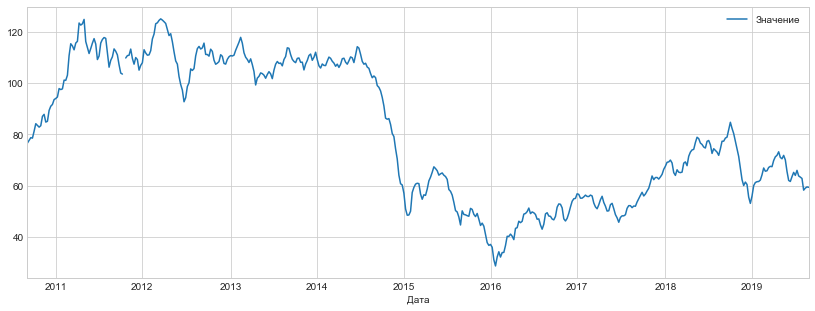

In [71]:
rcParams['figure.figsize'] = 14, 5
df_brent_w.plot()

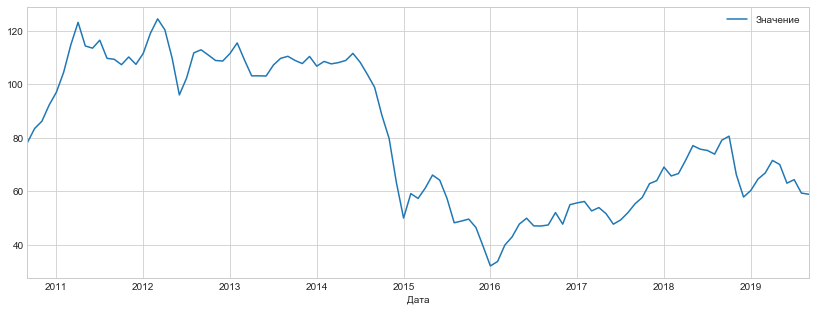

In [72]:
df_brent_m.plot()

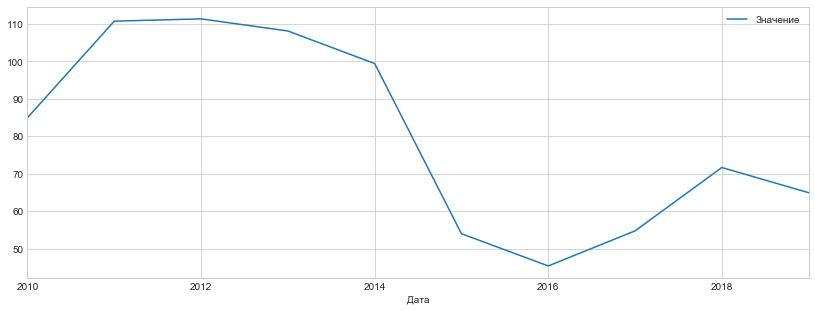

In [74]:
df_brent_y.plot()

#### Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

Если на годовом графике у нас идет гладкое изменение цены, то на месячном уже видны подъемы и падения цены. На недельном колебаний еще больше. С увеличением детальности выборки видно все больше колебаний цены, а также пропуски в данных, если они есть (например, на недельном графике)